In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.compose import make_column_transformer

In [2]:
df_train=pd.read_excel(r"C:\Users\91954\data science pg program\ML\Data_Train.xlsx")
df_train
                 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
dfc=df_train

In [4]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df_train.isnull().sum()#checking blank spaces

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df_train=df_train.dropna()#droping the null values

In [7]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df_train.loc[df_train['Price']=='']#checkling columns for blank spaces

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


EDA

In [10]:
#we can see firstly that the dateofjourney column is of object data type,so we have convert it to get the prediction right
df_train['day_of_depature']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.day
df_train['month_of_depature']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.month

<ipython-input-10-5f4fad8e6f19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['day_of_depature']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.day
<ipython-input-10-5f4fad8e6f19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['month_of_depature']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.month


In [11]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_depature,month_of_depature
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Date_of_Journey    10682 non-null  object
 2   Source             10682 non-null  object
 3   Destination        10682 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10682 non-null  object
 6   Arrival_Time       10682 non-null  object
 7   Duration           10682 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10682 non-null  object
 10  Price              10682 non-null  int64 
 11  day_of_depature    10682 non-null  int64 
 12  month_of_depature  10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [13]:
#as we can see tghat the day and month are extracted and also are in int so we will drop the date of journey column
df_train=df_train.drop('Date_of_Journey',axis=1)

In [14]:
df_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_depature,month_of_depature
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [15]:
#now as we have seen that deptime is also an object lets extract like before

In [16]:
df_train['dep_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['dep_minute']=pd.to_datetime(df_train['Dep_Time']).dt.minute

In [17]:
df_train=df_train.drop('Dep_Time',axis=1)
df_train

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_depature,month_of_depature,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Arrival_Time       10682 non-null  object
 5   Duration           10682 non-null  object
 6   Total_Stops        10682 non-null  object
 7   Additional_Info    10682 non-null  object
 8   Price              10682 non-null  int64 
 9   day_of_depature    10682 non-null  int64 
 10  month_of_depature  10682 non-null  int64 
 11  dep_hour           10682 non-null  int64 
 12  dep_minute         10682 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [19]:
#we will do the same with arrival
df_train['arrival_hour']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['arrival_minute']=pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [20]:
df_train=df_train.drop('Arrival_Time',axis=1)
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [21]:
duration=list(df_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
            
            
            

In [22]:
df_train['Duration_hour']=duration_hours
df_train['Duration_min']=duration_mins

In [23]:
df_train=df_train.drop('Duration',axis=1)
df_train


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   day_of_depature    10682 non-null  int64 
 8   month_of_depature  10682 non-null  int64 
 9   dep_hour           10682 non-null  int64 
 10  dep_minute         10682 non-null  int64 
 11  arrival_hour       10682 non-null  int64 
 12  arrival_minute     10682 non-null  int64 
 13  Duration_hour      10682 non-null  int64 
 14  Duration_min       10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [25]:
df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [26]:
df_train.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [27]:
#we can see most of the data shows no info so we think we should drop this column
#lets explore more more

In [28]:
df_train#we can see in this dataset that route and total stops have common relation between them which shows that if we take both into
#into consideration it should not give good result,so we are dropping route

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [29]:
df_train=df_train.drop(columns=['Additional_Info','Route'])

In [30]:
df_train

,Airline,Source,Destination,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Price              10682 non-null  int64 
 5   day_of_depature    10682 non-null  int64 
 6   month_of_depature  10682 non-null  int64 
 7   dep_hour           10682 non-null  int64 
 8   dep_minute         10682 non-null  int64 
 9   arrival_hour       10682 non-null  int64 
 10  arrival_minute     10682 non-null  int64 
 11  Duration_hour      10682 non-null  int64 
 12  Duration_min       10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [32]:
#lets do some visualization before encoding categorical data

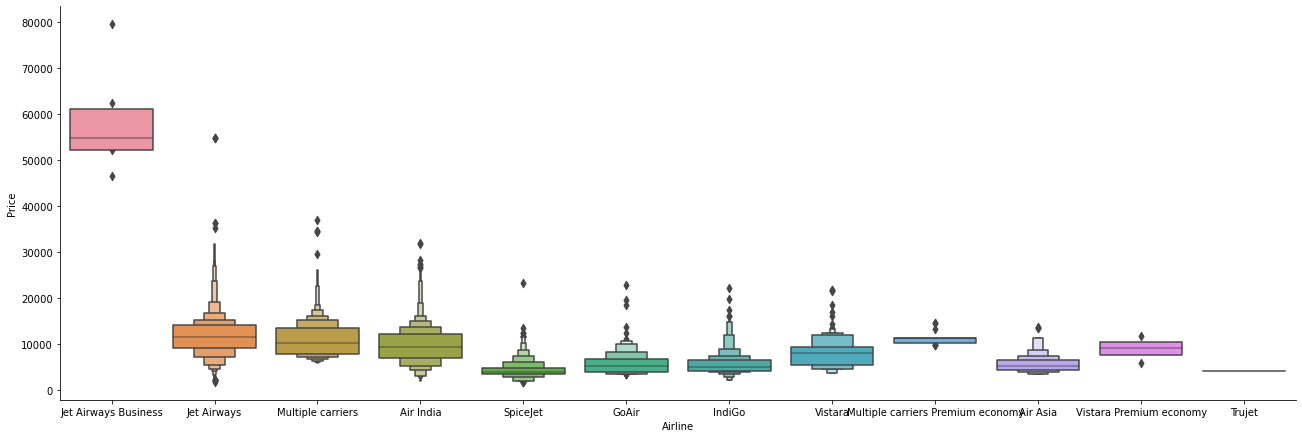

In [33]:
sns.catplot(y='Price',x='Airline',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()#we can see that jetairways are having more price than others the median is some how similar

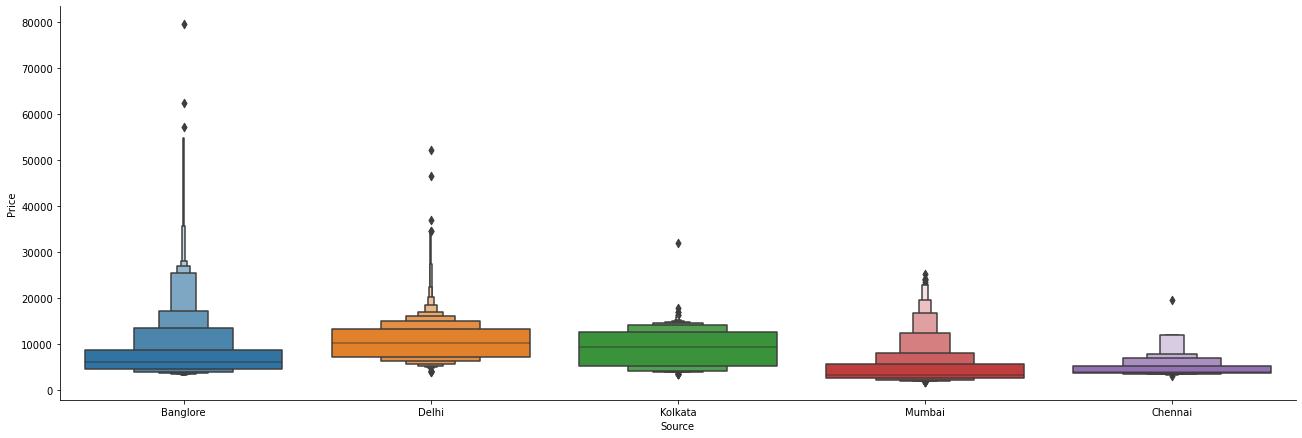

In [34]:
sns.catplot(y='Price',x='Source',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()#we can see bangalore has the most expensive tickets median is different but it shows fluctuating median 

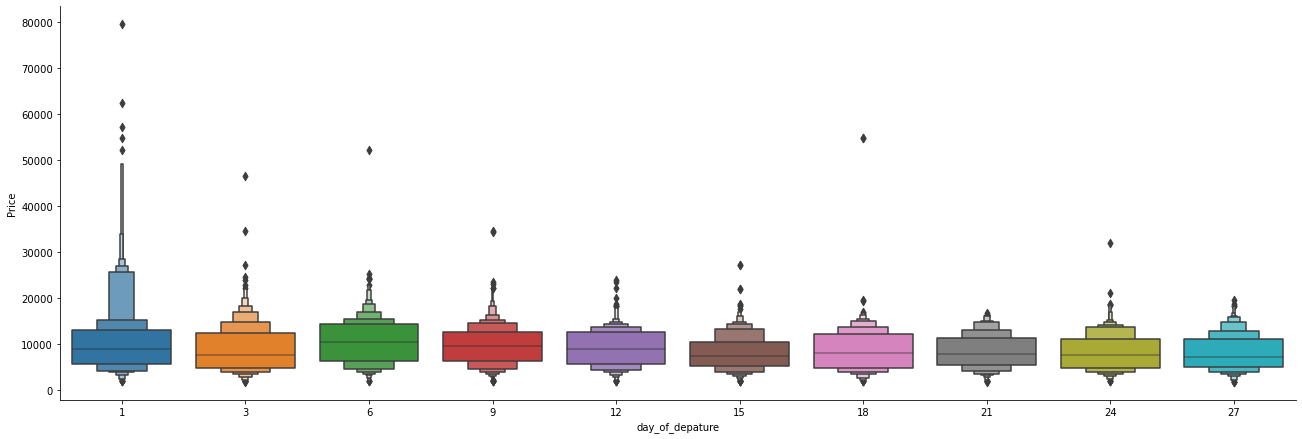

In [35]:
sns.catplot(y='Price',x='day_of_depature',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()#we can see that 1st day of month shows the most price as we can see that this daTE IS shows most demand of tickets

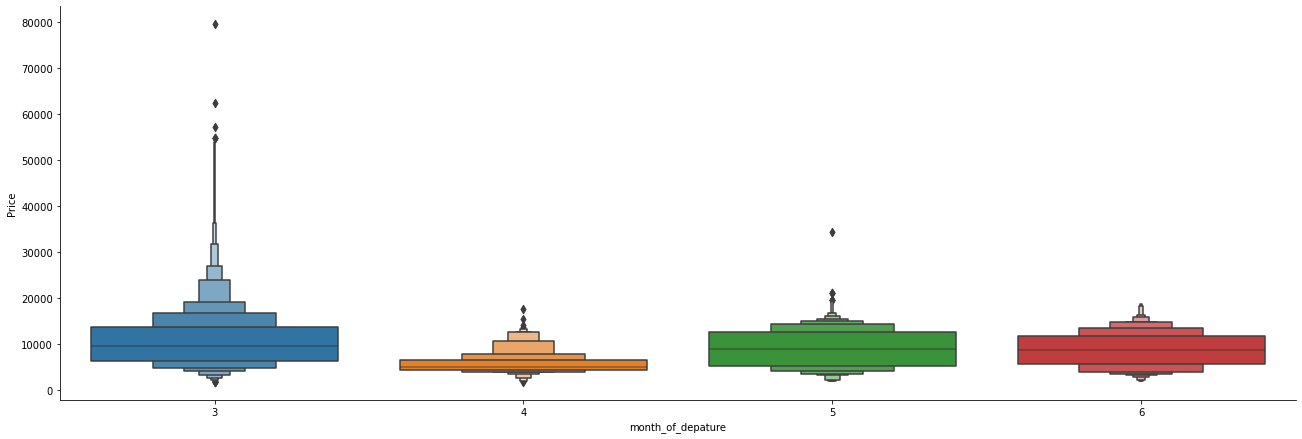

In [36]:
sns.catplot(y='Price',x='month_of_depature',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()#we can see 3rd month has the most price people explore more in 3rd month

# test data

In [37]:
df_test=pd.read_excel(r"C:/Users/91954/data science pg program/ML/Test_set.xlsx")
df_test
                 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [38]:
dft=df_test

In [39]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [40]:
df_test.loc[df_test['Additional_Info']=='']#checkling columns for blank spaces

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [41]:
df_test['day_of_depature']=pd.to_datetime(df_test.Date_of_Journey,format='%d/%m/%Y').dt.day
df_test['month_of_depature']=pd.to_datetime(df_test.Date_of_Journey,format='%d/%m/%Y').dt.month


In [42]:
df_test['dep_hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['dep_minute']=pd.to_datetime(df_test['Dep_Time']).dt.minute

In [43]:
df_test['arrival_hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['arrival_minute']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [44]:
duration=list(df_test['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
            

In [45]:
df_test['Duration_hour']=duration_hours
df_test['Duration_min']=duration_mins
df_test=df_test.drop(columns=['Dep_Time','Date_of_Journey','Arrival_Time','Duration','Additional_Info','Route'],axis=1)

df_test


,Airline,Source,Destination,Total_Stops,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,15,15


In [46]:
df_test

,Airline,Source,Destination,Total_Stops,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,15,15


In [47]:
df_train

,Airline,Source,Destination,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [48]:
#as we can see that all the columns are categorical except target column so we are going use the encoder to encode the remaining object columns

In [49]:
#as Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=df_train[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
#as Source is Nominal Categorical data we will perform OneHotEncoding
Source=df_train[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
#as Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=df_train[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [52]:
#concatenate dataframe
df_train=pd.concat([df_train,Airline,Source,Destination],axis=1)

In [53]:
df_train=df_train.drop(columns=['Airline','Source','Destination'])

In [54]:
df_train

,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,non-stop,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,non-stop,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,non-stop,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [55]:
en=LabelEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        df_train[i]=en.fit_transform(df_train[i].values.reshape(-1,1))
    
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
df_train

,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,4,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,4,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,4,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [57]:
#lets encode test data

In [58]:
Airline=df_test[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [59]:
Source=df_test[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [60]:
Destination=df_test[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [61]:
df_test=pd.concat([df_test,Airline,Source,Destination],axis=1)

In [62]:
df_test

,Airline,Source,Destination,Total_Stops,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,...,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,...,0,0,0,1,0,0,0,0,0,0
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,...,0,0,1,0,0,1,0,0,0,0
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,...,0,0,1,0,0,1,0,0,0,0


In [63]:
df_test=df_test.drop(columns=['Airline','Source','Destination'])

In [64]:
en=LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=en.fit_transform(df_test[i].values.reshape(-1,1))
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [65]:
df_test

,Total_Stops,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,4,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,4,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,0,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,0,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0


In [66]:
df_train

,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,4,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,4,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,4,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [67]:
dft.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [68]:
dfc.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [69]:
#sowe can drop trujet as only 1 data is there and no data there in test data

In [70]:
df_train.columns

Index(['Total_Stops', 'Price', 'day_of_depature', 'month_of_depature',
       'dep_hour', 'dep_minute', 'arrival_hour', 'arrival_minute',
       'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [71]:
df_train=df_train.drop(columns=['Airline_Trujet'])

In [72]:
df_train

,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,4,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,4,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,4,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [73]:
df_test

,Total_Stops,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,4,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,4,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,0,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,0,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0


In [79]:
#correlation

In [78]:
df_train.corr()

,Total_Stops,Price,day_of_depature,month_of_depature,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,-0.571221,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980,-0.606137,0.182223,...,0.023586,0.270634,-0.482296,-0.113010,0.315130,-0.482296,0.515760,0.315130,0.270634,-0.021872
Price,-0.571221,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
day_of_depature,0.029225,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
month_of_depature,-0.026328,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
dep_hour,0.039224,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
dep_minute,0.048901,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
arrival_hour,-0.095650,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
arrival_minute,0.175980,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hour,-0.606137,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_min,0.182223,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


<AxesSubplot:>

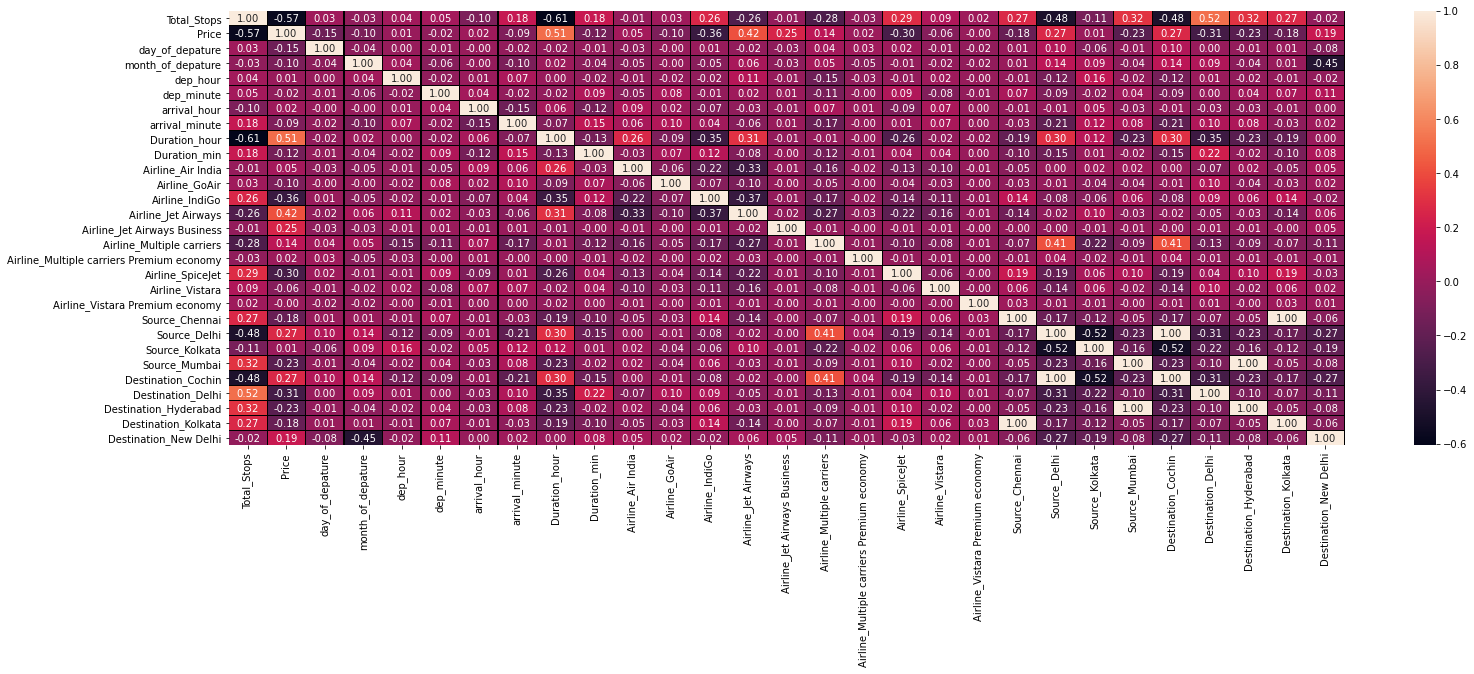

In [81]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df_train.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

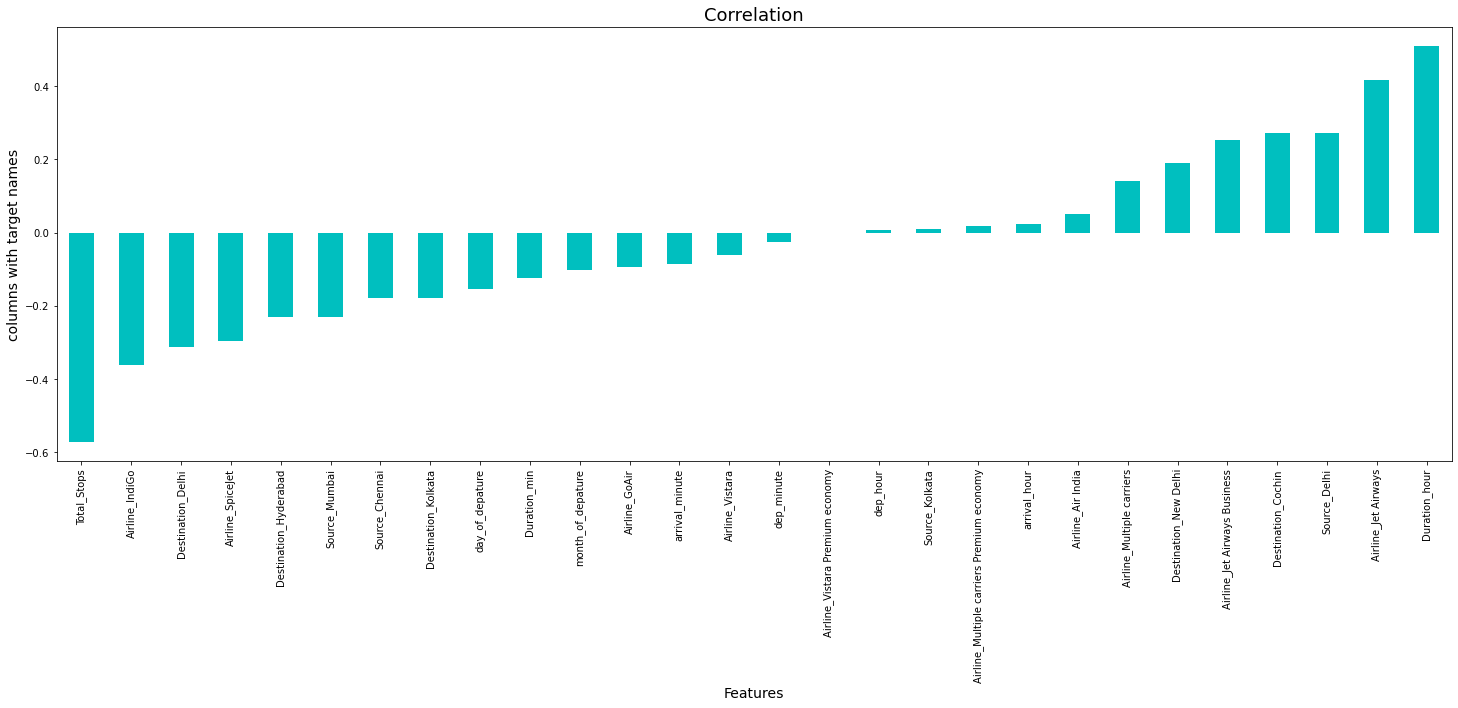

In [82]:
plt.figure(figsize=(25,8))
df_train.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [83]:
#we can see that hour duration has the most and jet airways also has some positive relation,total stop have negative relation

In [76]:
#we will not perform skewness  or outlier technique as the data has all the column categorical except target column

In [87]:
x=df_train.drop("Price",axis=1)
y=df_train['Price']

In [88]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x

array([[ 1.40720999,  1.23728754, -1.46740227, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [-0.2537031 , -1.47530729,  0.25028893, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [-0.2537031 , -0.53179604,  1.10913453, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       ...,
       [ 1.40720999,  1.59110426, -0.60855667, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [ 1.40720999, -1.47530729, -1.46740227, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [-0.2537031 , -0.53179604,  0.25028893, ..., -0.2642058 ,
        -0.19231927, -0.30917591]])

In [95]:
dftw=df_test


In [96]:
df_test=sc.fit_transform(df_test)
df_test

array([[-0.792411  , -0.83733254,  1.09474457, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [-0.792411  , -0.11087675,  0.2405048 , ..., -0.27358563,
        -0.16997235, -0.31276448],
       [-0.792411  ,  0.97880692,  0.2405048 , ..., -0.27358563,
        -0.16997235, -0.31276448],
       ...,
       [-0.792411  , -0.83733254, -1.46797475, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [-0.792411  , -0.83733254, -1.46797475, ..., -0.27358563,
        -0.16997235, -0.31276448],
       [-0.792411  ,  0.25235114,  1.09474457, ..., -0.27358563,
        -0.16997235, -0.31276448]])

In [92]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.6105854512102109
At random state0,the testing  accuracy is :- 0.5562359371922678


At random state1,the training accuracy is :- 0.589668642586411
At random state1,the testing  accuracy is :- 0.5895671802708857


At random state2,the training accuracy is :- 0.586582218962465
At random state2,the testing  accuracy is :- 0.5927398030207339


At random state3,the training accuracy is :- 0.5871744757579502
At random state3,the testing  accuracy is :- 0.5913416069081077


At random state4,the training accuracy is :- 0.5894005104184667
At random state4,the testing  accuracy is :- 0.5904023834625041


At random state5,the training accuracy is :- 0.5866309086804236
At random state5,the testing  accuracy is :- 0.5914685662319561


At random state6,the training accuracy is :- 0.5813904066032178
At random state6,the testing  accuracy is :- 0.6015266954646644


At random state7,the training accuracy is :- 0.5825051622442192
At random state7,the testing

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=22)

In [99]:
lr.fit(X_train,Y_train)

LinearRegression()

In [100]:
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.5850425763717362


In [101]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.5858077287871337 and accuracy score for training is -0.5670319480573114 and accuracy score for testing is 0.5850425763717362


At cross fold 3 the cv score is 0.5864174353712113 and accuracy score for training is -0.5670319480573114 and accuracy score for testing is 0.5850425763717362


At cross fold 4 the cv score is 0.5881729927686432 and accuracy score for training is -0.5670319480573114 and accuracy score for testing is 0.5850425763717362


At cross fold 5 the cv score is 0.5866520542327712 and accuracy score for training is -0.5670319480573114 and accuracy score for testing is 0.5850425763717362


At cross fold 6 the cv score is 0.5867714534613178 and accuracy score for training is -0.5670319480573114 and accuracy score for testing is 0.5850425763717362


At cross fold 7 the cv score is 0.5859401892221404 and accuracy score for training is -0.5670319480573114 and accuracy score for testing is 0.5850425763717362


At cross fold 8 the cv score is 0.

In [102]:
#as the cv score  impacted the training accuracy  we are taking cv =5

In [103]:
#regularization

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest( f_regression,k=5).fit_transform(x, y)
X_new


array([[ 1.40720999, -0.97061397,  2.05015058, -0.75053033, -0.36651266],
       [-0.2537031 , -0.38199906, -0.48776905, -0.75053033, -0.36651266],
       [-0.2537031 ,  1.03067671, -0.48776905,  1.3323912 , -0.36651266],
       ...,
       [ 1.40720999, -0.85289099, -0.48776905,  1.3323912 ,  2.72841873],
       [ 1.40720999, -0.97061397, -0.48776905, -0.75053033, -0.36651266],
       [-0.2537031 , -0.26427608, -0.48776905, -0.75053033, -0.36651266]])

In [105]:
len(X_new)

10682

In [106]:
#this are the best values as they all are best

In [107]:
#regularization

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,30)),'selection':['cyclic', 'random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)



C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71555882.60939789, tolerance: 11501052.13009495
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68177603.34581757, tolerance: 11077219.125766333
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4223300879.746937, tolerance: 11085630.239002846
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

{'alpha': 1, 'random_state': 3, 'selection': 'random'}


In [109]:
ls=Lasso(alpha=1,random_state=3,selection='random')
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.585507751716574

In [110]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5866188161175387

In [111]:
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rs=Ridge()
clf=GridSearchCV(rs,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'alpha': 1, 'random_state': 0, 'solver': 'svd'}


In [112]:
rs=Ridge(alpha=1,random_state=0,solver='svd')
rs.fit(X_train,Y_train)
rs.score(X_train,Y_train)
pred_rs=rs.predict(X_test)
rss=r2_score(Y_test,pred_ls)
rss

0.585507751716574

In [113]:
cv_score=cross_val_score(rs,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5866153213571292

In [114]:
#ensemble techniques

In [115]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [116]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: 81.54128691643734
cross_val_score: 80.98580427850295


In [117]:
#as we can see random forest is giving a great score

In [118]:
#knn model

In [119]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}


In [120]:
kn= KNeighborsRegressor(n_neighbors=5,algorithm='kd_tree',leaf_size=15)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,x,y,cv=5)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: 73.78586241397656
cross_val_score: 74.76095430784395


In [121]:
#its giving a good score but it is not better than random forest

In [122]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,10))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 3, 'random_state': 8}


In [124]:
bg=BaggingRegressor(max_features=3,random_state=8)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,x,y,cv=5)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: 44.36329907468907
cross_val_score: 43.02783660188855


In [125]:
#doesnt give a good score

In [126]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'random'}


In [127]:
dt=DecisionTreeRegressor(criterion="mse",splitter="random",max_features="auto")
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dtt=r2_score(Y_test,pred_decision)
print('r2_score:',dtt*100)
dtscore=cross_val_score(dt,X,Y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

r2_score: 70.57043823803455
cross_val_score: 70.05035789416326


In [128]:
#its a good score but we came to conclusion that random forest is best

In [129]:
r2_score= {
    'model':['linear regression', 'random forest','KNeighborsRegressor','bagging','DecisionTreeRegressor'],
    'R2score':[58.66153213571292,81.54128691643734,73.78586241397656,44.36329907468907,70.57043823803455 ]
}
r2_Score=pd.DataFrame(data=r2_score)
r2_Score.sort_values(by=['R2score'], ascending=False)

,model,R2score
1,random forest,81.541287
2,KNeighborsRegressor,73.785862
4,DecisionTreeRegressor,70.570438
0,linear regression,58.661532
3,bagging,44.363299


In [130]:
#we conclude random forest has the best model 

In [131]:
filename='flightprice.pkl'
pickle.dump(rf,open(filename,'wb'))


In [132]:
loaded_model=pickle.load(open('flightprice.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8154128691643734


In [133]:
conclusion=pd.DataFrame([loaded_model.predict(df_test)],index=['Predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Predicted,12555.612667,4226.0,12941.368333,12828.186667,3688.445,10378.06,11012.14,5701.95,4476.11,14471.227667,...,8834.988774,3273.58,6816.28,7549.16,2001.443333,10255.14,4736.45,15595.985,14796.05,7418.14


In [134]:
#so this is the predicted data